# Census Income Project.

Data Description.

Importing Required Libraries.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading the data.

In [63]:
df=pd.read_csv('census.csv')

In [64]:
df=pd.DataFrame(df)

In [65]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [66]:
df.shape   #checking data dimensions.

(32560, 15)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [68]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

Checking for Null Values:

In [69]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

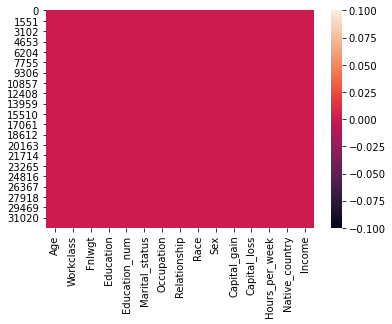

In [70]:
sns.heatmap(df.isnull())

Statistical Summary.

In [71]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Analysis.

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


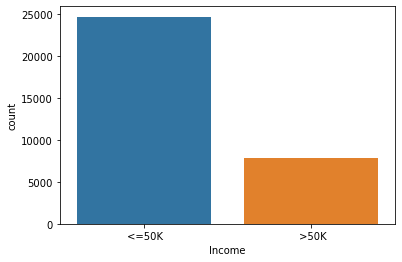

In [72]:
sns.countplot(x='Income',data=df)
print(df['Income'].value_counts())
plt.show()

Separating categorical and numerical data.

In [73]:
Cat=['Workclass','Education','Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex','Native_country']
Num=['Age', 'Fnlwgt', 'Education_num','Capital_gain', 'Capital_loss', 'Hours_per_week']

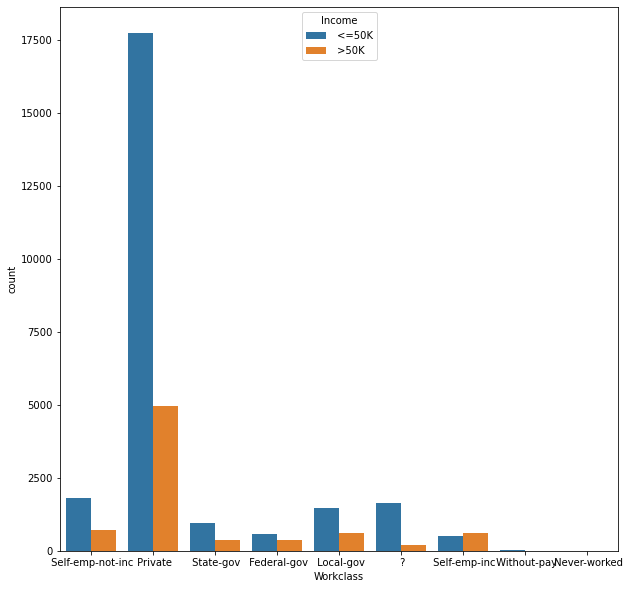

In [74]:
plt.figure(figsize=(10,10))
sns.countplot(x='Workclass',hue='Income',data=df)

In [75]:
print(df['Workclass'].value_counts())
print(df['Education'].value_counts())
print(df['Marital_status'].value_counts())
print(df['Occupation'].value_counts())
print(df['Relationship'].value_counts())
print(df['Race'].value_counts())
print(df['Sex'].value_counts())
print(df['Native_country'].value_counts())
print('\n')

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


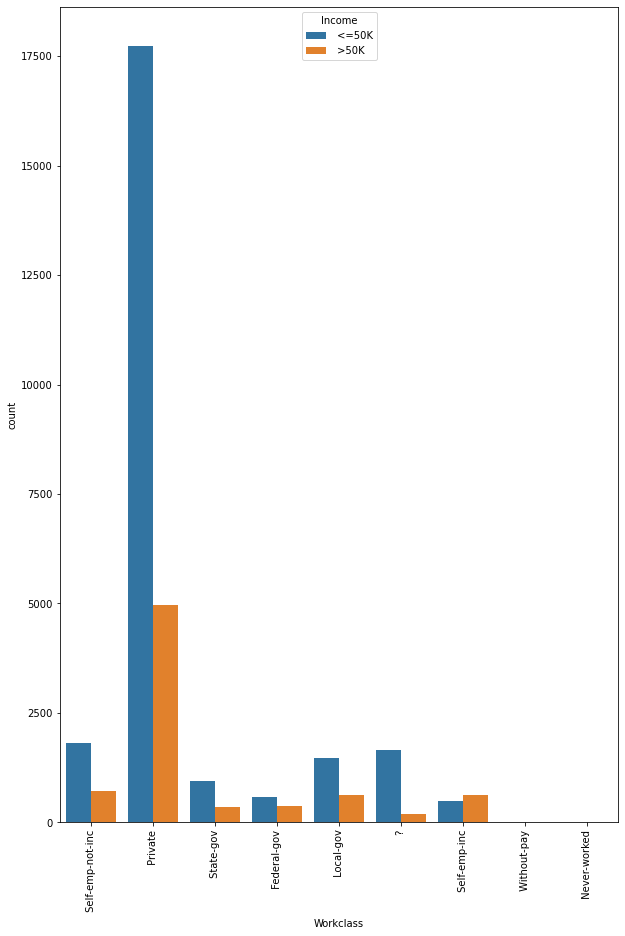

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


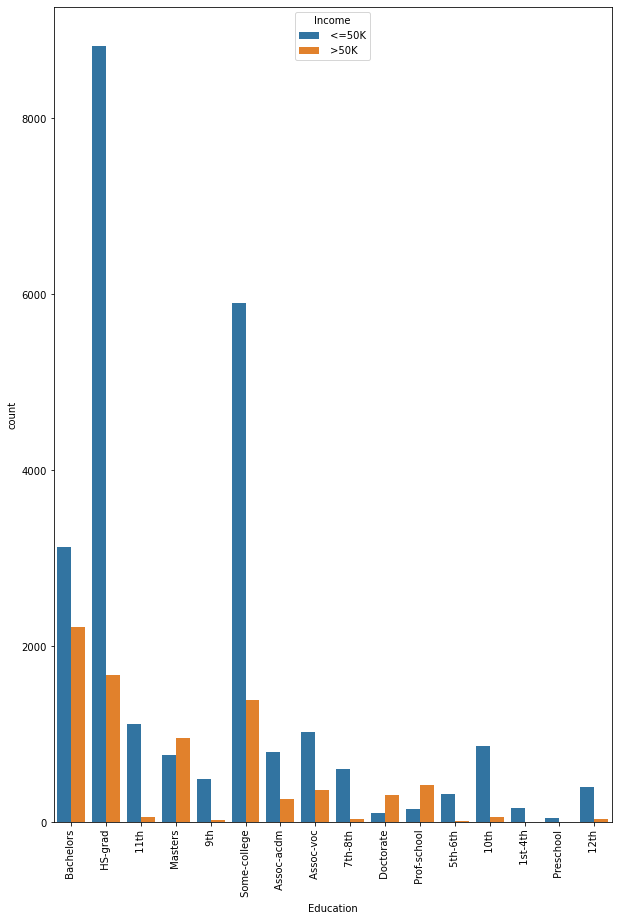

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


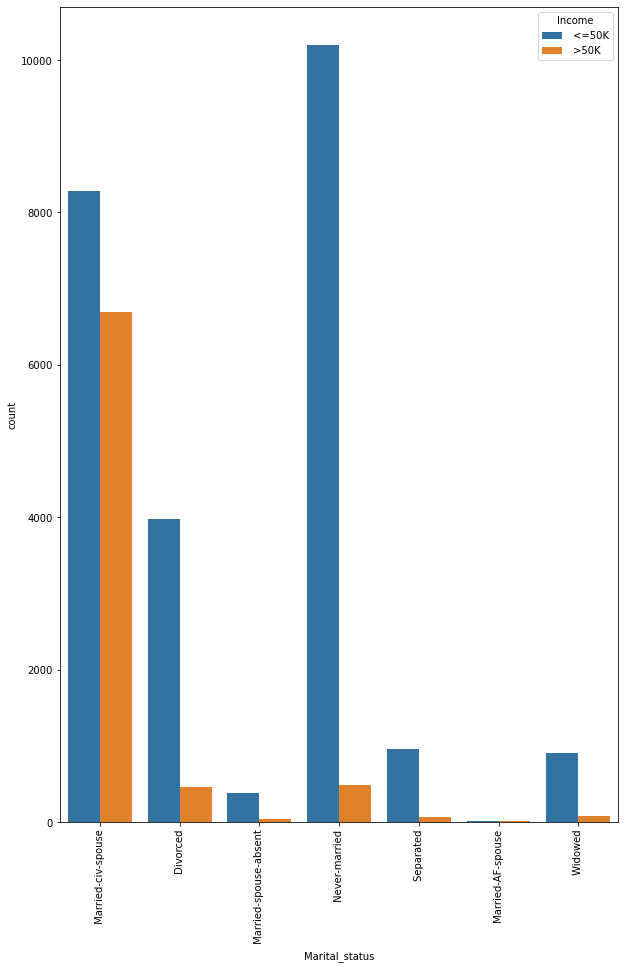

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


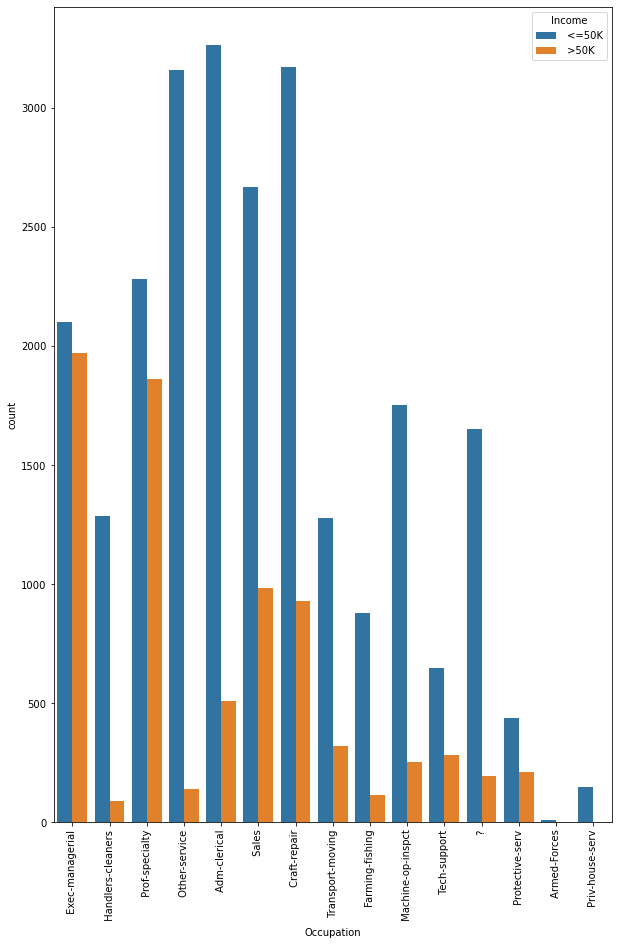

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


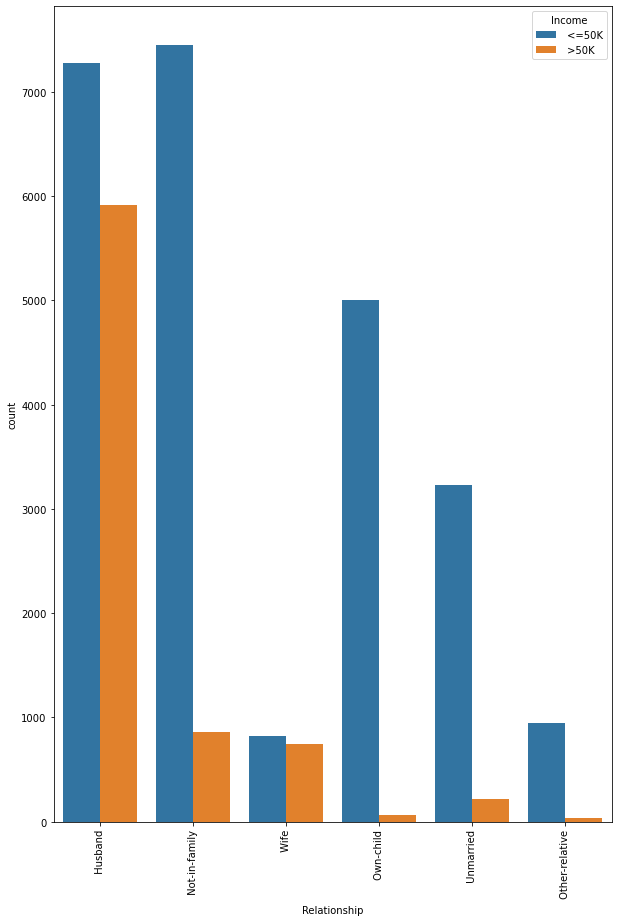

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


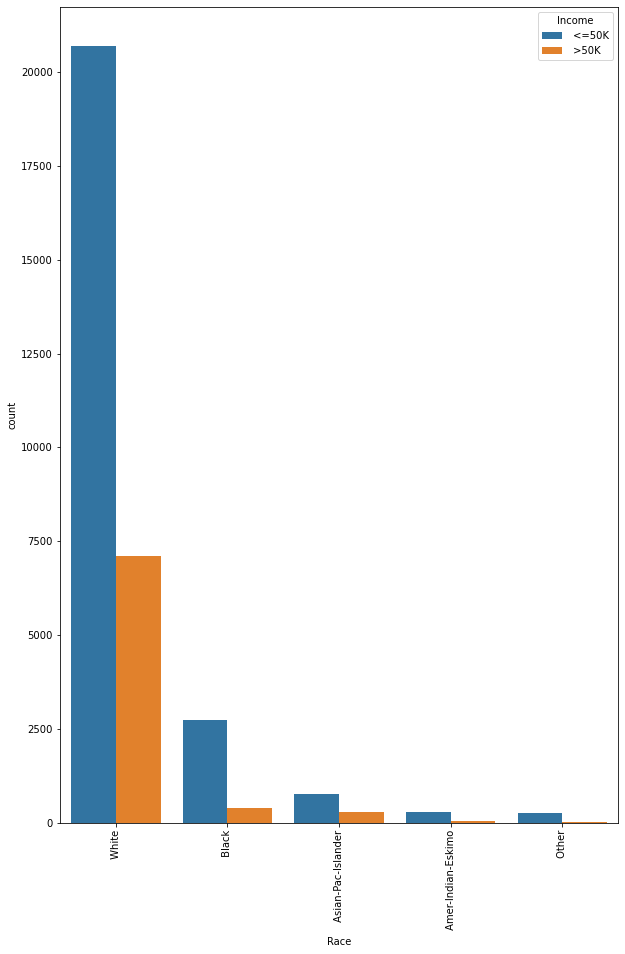

 Male      21789
 Female    10771
Name: Sex, dtype: int64


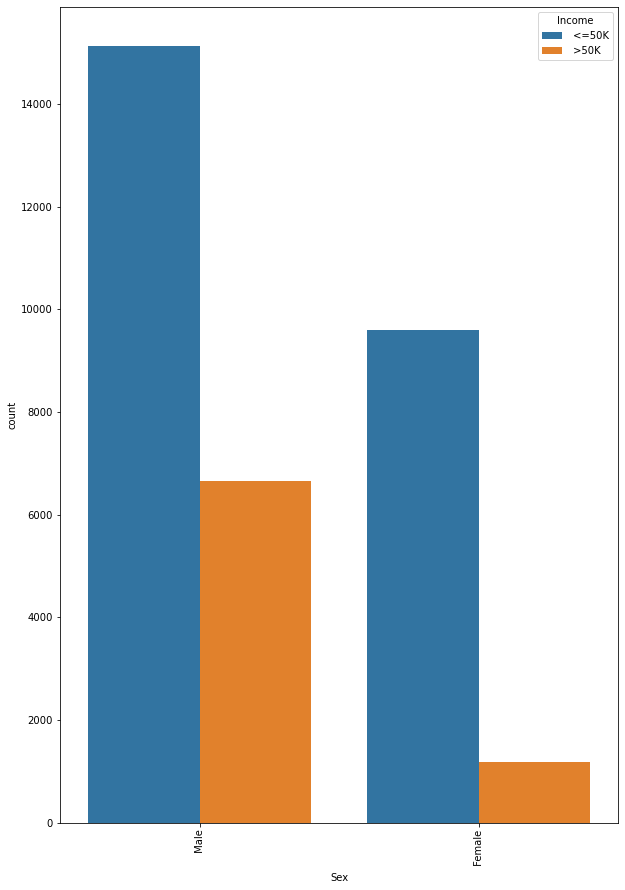

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

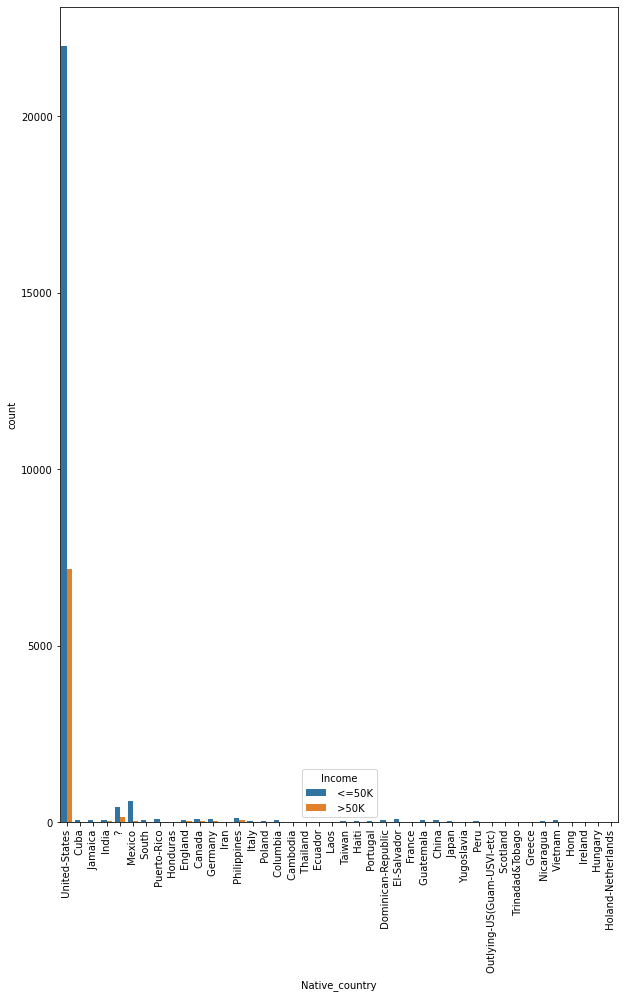

In [76]:
for m in Cat:
    plt.figure(figsize=(10,15))
    sns.countplot(x=m,hue='Income',data=df)
    print(df[m].value_counts())
    plt.xticks(rotation=90)
    plt.show()

In [77]:
corr=df.corr()

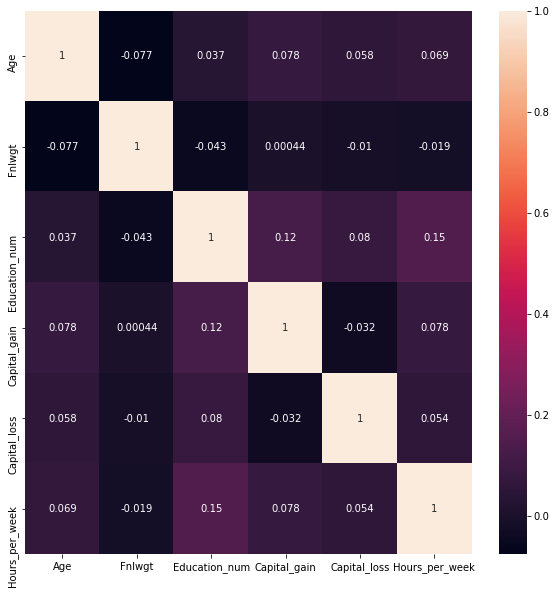

In [78]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

Checking Skewness and Outliers

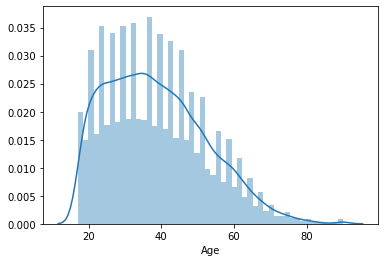

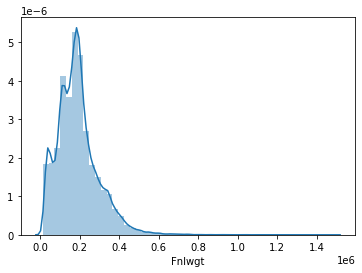

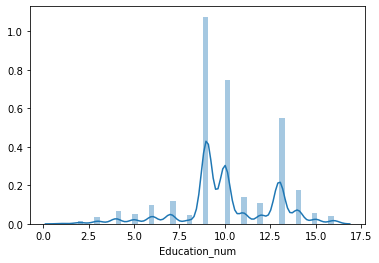

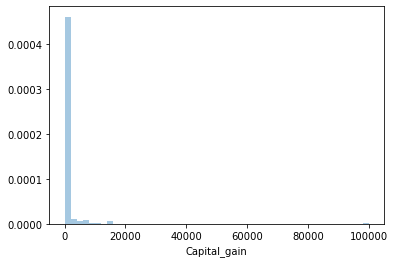

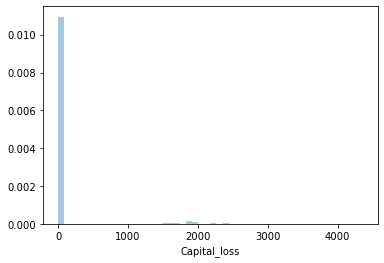

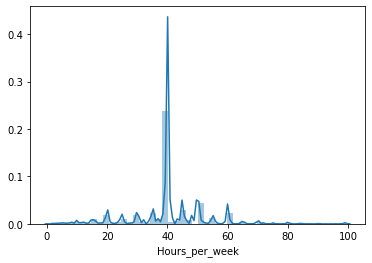

In [79]:
for i in df.describe().columns:
    sns.distplot(df[i].dropna())
    plt.show()

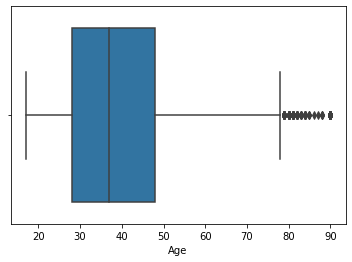

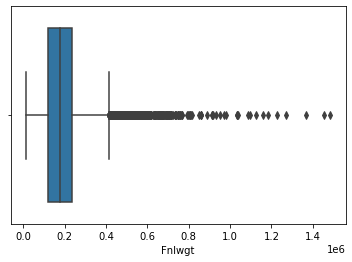

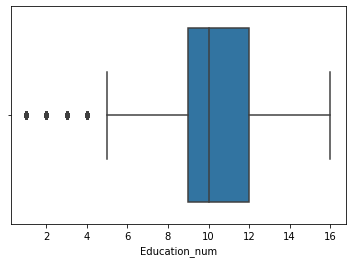

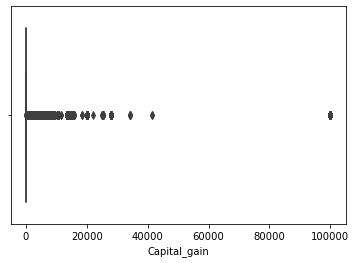

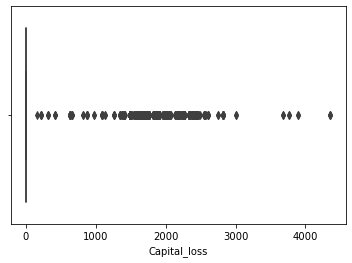

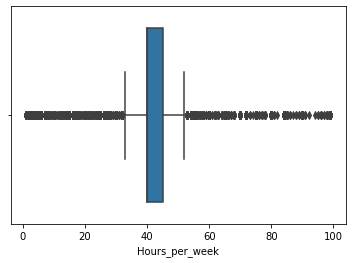

In [80]:
for i in df.describe().columns:
    sns.boxplot(df[i].dropna())
    plt.show()

In [81]:
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

In [82]:
from sklearn.preprocessing import power_transform

In [83]:
x_ske=df.drop(['Age','Workclass','Education','Education_num','Marital_status','Occupation','Relationship','Race','Sex','Hours_per_week','Native_country','Income'],axis=1)

In [84]:
x_ske.head()

,Fnlwgt,Capital_gain,Capital_loss
0,83311,0,0
1,215646,0,0
2,234721,0,0
3,338409,0,0
4,284582,0,0


In [85]:
x_ske=power_transform(x_ske)

In [86]:
x_ske=pd.DataFrame(x_ske)

In [87]:
x_ske.skew()

0    0.016914
1    3.016951
2    4.299511
dtype: float64

In [88]:
x_ske.head()

,0,1,2
0,-1.089889,-0.30137,-0.221213
1,0.398743,-0.30137,-0.221213
2,0.562540,-0.30137,-0.221213
3,1.340398,-0.30137,-0.221213
4,0.957182,-0.30137,-0.221213


In [89]:
df['Fnlwgt']=x_ske[0]

In [90]:
df['Capital_gain']=x_ske[1]
df['Capital_loss']=x_ske[2]

In [91]:
df.skew()

Age               0.558738
Fnlwgt            0.016914
Education_num    -0.311630
Capital_gain      3.016951
Capital_loss      4.299511
Hours_per_week    0.227636
dtype: float64

In [92]:
print(df['Workclass'].mode())
print(df['Occupation'].mode())
print(df['Native_country'].mode())

0     Private
dtype: object
0     Prof-specialty
dtype: object
0     United-States
dtype: object


In [93]:
df['Workclass']=df['Workclass'].replace(' ?',np.nan)
df['Occupation']=df['Occupation'].replace(' ?',np.nan)
df['Native_country']=df['Native_country'].replace(' ?',np.nan)

In [94]:
df['Workclass']=df['Workclass'].fillna('Private')
df['Occupation']=df['Occupation'].fillna('Prof-specialty')
df['Native_country']=df['Native_country'].fillna('United-States')

In [95]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Encoding.

In [96]:
from sklearn.preprocessing import LabelEncoder

In [97]:
le=LabelEncoder()

In [98]:
df['Workclass']=le.fit_transform(df['Workclass'])
df['Occupation']=le.fit_transform(df['Occupation'])
df['Native_country']=le.fit_transform(df['Native_country'])
df['Education']=le.fit_transform(df['Education'])
df['Marital_status']=le.fit_transform(df['Marital_status'])
df['Occupation']=le.fit_transform(df['Occupation'])
df['Relationship']=le.fit_transform(df['Relationship'])
df['Race']=le.fit_transform(df['Race'])
df['Sex']=le.fit_transform(df['Sex'])

In [99]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,-1.089889,9,13,2,3,0,4,1,-0.30137,-0.221213,13,38,<=50K
1,38,3,0.398743,11,9,0,5,1,4,1,-0.30137,-0.221213,40,38,<=50K
2,53,3,0.562540,1,7,2,5,0,2,1,-0.30137,-0.221213,40,38,<=50K
3,28,3,1.340398,9,13,2,9,5,2,0,-0.30137,-0.221213,40,4,<=50K
4,37,3,0.957182,12,14,2,3,5,4,0,-0.30137,-0.221213,40,38,<=50K


In [100]:
df=pd.DataFrame(df)

In [101]:
x=df.drop('Income',axis=1)
y=df['Income']

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
sc=StandardScaler()

In [104]:
x=sc.fit_transform(x)

In [105]:
x

array([[ 0.83709708,  1.02638429, -1.08988899, ..., -0.2212132 ,
        -2.22212013,  0.25138175],
       [-0.04264043, -0.23786147,  0.39874263, ..., -0.2212132 ,
        -0.03542999,  0.25138175],
       [ 1.05703146, -0.23786147,  0.56254016, ..., -0.2212132 ,
        -0.03542999,  0.25138175],
       ...,
       [ 1.42358875, -0.23786147, -0.2197547 , ..., -0.2212132 ,
        -0.03542999,  0.25138175],
       [-1.21562378, -0.23786147,  0.27166793, ..., -0.2212132 ,
        -1.65520046,  0.25138175],
       [ 0.98372   ,  0.39426141,  0.98216482, ..., -0.2212132 ,
        -0.03542999,  0.25138175]])

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
lr=LogisticRegression()
dr=DecisionTreeClassifier()
svc=SVC()
rf=RandomForestClassifier()
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [108]:
model=[lr,dr,svc,rf]

Splitting the data.

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=50)

In [110]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuracy score of LogisticRegression() is:
0.8208435708435708
[[6921  449]
 [1301 1097]]
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      7370
        >50K       0.71      0.46      0.56      2398

    accuracy                           0.82      9768
   macro avg       0.78      0.70      0.72      9768
weighted avg       0.81      0.82      0.81      9768



accuracy score of DecisionTreeClassifier() is:
0.8001638001638002
[[6392  978]
 [ 974 1424]]
              precision    recall  f1-score   support

       <=50K       0.87      0.87      0.87      7370
        >50K       0.59      0.59      0.59      2398

    accuracy                           0.80      9768
   macro avg       0.73      0.73      0.73      9768
weighted avg       0.80      0.80      0.80      9768



accuracy score of SVC() is:
0.8391687141687142
[[6917  453]
 [1118 1280]]
              precision    recall  f1-score   support

       <=50K       0.86      0.

Cross-Validation. 

In [111]:
from sklearn.model_selection import cross_val_score

In [112]:
Lrs=cross_val_score(lr,x,y,cv=5)
print('cross validation of LogisticRegression:',Lrs.mean())

cross validation of LogisticRegression: 0.8154176904176904


In [113]:
drs=cross_val_score(dr,x,y,cv=5)
print('cross validation of DecisionTreeClassiffier:',drs.mean())

cross validation of DecisionTreeClassiffier: 0.8019656019656021


In [114]:
svr=cross_val_score(svc,x,y,cv=5)
print('cross validation of SVM:',svr.mean())

cross validation of SVM: 0.8378685503685503


In [115]:
rfr=cross_val_score(rf,x,y,cv=5)
print('cross valdation of RandomForestClassifier:',rfr.mean())

cross valdation of RandomForestClassifier: 0.8503071253071253


Hyper Parameter Tuning.

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
grid_param={'criterion':['gini','entropy']}
gd=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=5)
gd.fit(x,y)
best_parameter=gd.best_params_
print('best_parameter:',best_parameter)

best_parameter: {'criterion': 'gini'}


In [118]:
gd_pred=gd.best_estimator_.predict(x_test)

In [119]:
accuracy_score(y_test,gd_pred)

1.0

In [120]:
print(confusion_matrix(y_test,gd_pred))
print(classification_report(y_test,gd_pred))

[[7370    0]
 [   0 2398]]
              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00      7370
        >50K       1.00      1.00      1.00      2398

    accuracy                           1.00      9768
   macro avg       1.00      1.00      1.00      9768
weighted avg       1.00      1.00      1.00      9768



Saving the Best Model.

In [122]:
import joblib
joblib.dump(gd.best_estimator_,'Census.pkl')

['Census.pkl']